In [5]:
import pandas as pd
import matplotlib.pyplot as plt

## Titanic
タイタニックは英国の客船で処女航海の1912年に北太平洋上で氷山に接触し沈没し、犠牲書が多数でた。  
映画で何度か上映されたため世界的に有名になった。    
この乗客に関するデータがありここでは、一つのNotebook "PLT_Titanic.jpynb"を用いてpandasの練習を行う。    
<img src = "https://images-na.ssl-images-amazon.com/images/I/51zZPJ6MbfL._SY445_.jpg" align = "left" width = "20%">     

In [3]:
# Read training data  
titanic_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
df = pd.read_csv(titanic_url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###### データの説明      
+ PassengerId : 乗客ID    
+ Survived : 生存結果(1:生存、0:死亡)   
+ Pclass : 客室クラス 1 > 2 > 3   
+ Name : 名前  
+ Sex : 性別   
+ Age : 年齢   
+ SibSp : 兄弟、配偶者の人数  
+ Parch : 両親、子供の人数  
+ Ticket : チケット番号  
+ Fare : チケット料金   
+ Cabin : 部屋番号  
+ Embarked : 乗船した港  

このデータについて、データ数は891、Ageはいくつか欠損している。欠損レコードを除くとデータ数が激減するので補完する。   
補完にはいくつかの考え方(min, max, mean etc)があり、あまり意味はないが中央値(median)を採用する。

In [13]:
df["Age"].fillna(df.Age.median(), inplace = True)
df.Age.shape  # 891 values

(891,)

年齢のヒストグラムを示したのが下図である。中央値で補完したため20代後半の人数が突出している。  

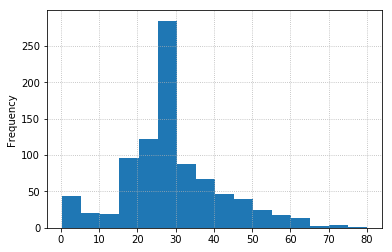

In [39]:
df.Age.plot(kind = "hist", bins = 16)
plt.grid(linestyle = ":")

次は乗客の年齢構成を円グラフ(pie chart)でみる。   
体力的な観点から、子供(child)を15歳未満、成年(adult)を15歳以上60歳未満、高齢者(elderly)を60歳以上とした。  

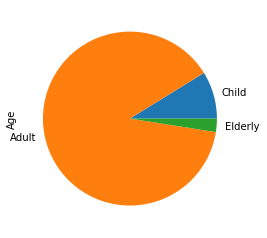

In [38]:
# それぞれの年齢層の数を求める
child = (df.Age < 15).sum()
adult = ((df.Age >= 15) & (df.Age < 60)).sum()
elderly = (df.Age > 60).sum()

# pie-chart用のpd.Series
series = pd.Series([child, adult, elderly], index = ["Child", "Adult", "Elderly"], name = "Age")

# pie-chart作成
series.plot.pie(figsize = (4, 4))

次は男女別のクロス集計表(cross tabulation)を求めて、その棒グラフ(bar graph)をみる。

In [36]:
cross_01 = df.pivot_table(index = ["Survived"], columns = ["Sex"], \
                         values = ["PassengerId"], aggfunc = "count", fill_value = 0)
cross_01

PassengerId     
Sex           female male
Survived                 
0                 81  468
1                233  109

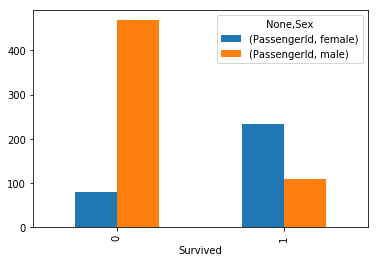

In [37]:
cross_01.plot(kind = "bar")

###### Tea Break
Titanicデータは、統計分析の例題としてよく用いられている。このデータを説明するサイトは多くあり、例えば次もそうである。
+ <a href = https://www.rdocumentation.org/packages/datasets/versions/3.5.2/topics/Titanic>R Documentaiton "Titanic datasets"</a>    
沈没したRMS Titanic(RMS : Royal Mail Ship または Steamer、郵便船としての機能があった)そのものの調査も行われており、この調査結果は次にある。
+ <a href = "https://www.encyclopedia-titanica.org">Encyclopedia Titanica : Titanic Facts, History and Biography</a>     
Titanicを実際に映したビデオやドキュメンタリーがいくつかあり、映画「タイタニック」(1997)の映画監督 James.F.Cameronも実際に科学的調査を実施し、そのレポートを次に示している。
+ <a href = "http://www.natgeotv.com/int/titanic-20-years-later-with-james-cameron">TITANIC : 20 YEARS LATER WITH JAMES CAMERON</a>